### K- Nearest Neighbour

1. Introduction:
  + simple, parametric and lazy learning algorithm used for both classification and regression part 

2. How KNN works:
   + Steps:
   + Choose the number of neighbour(K).
   + Compute the distance between test sample with trained sample
   + Select the K nearest neighbour based on the computed distance.
   + Assign the most common class among the neighbour(for classification) and aaverage(for regression).

3. Implementation - Breast Cancer

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df1 = df
# df1.isnull().sum()

In [5]:
# df2 = df.drop(columns=['id'], inplace = True)
df1.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

C:\Users\RICKY\AppData\Local\Temp\ipykernel_13984\2424145745.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='diagnosis', palette='coolwarm')


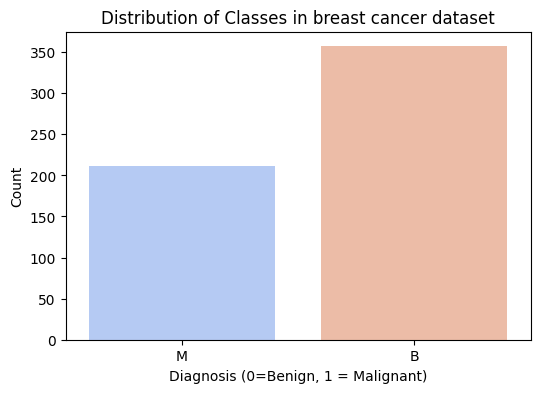

In [6]:
#plot the distribution of classimport 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(data=df1, x='diagnosis', palette='coolwarm')
plt.title('Distribution of Classes in breast cancer dataset')
plt.xlabel('Diagnosis (0=Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

In [7]:
#Encoding the target variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['diagnosis'] = label_encoder.fit_transform(df1['diagnosis'])


#splitting the data
from sklearn.model_selection import train_test_split
X_bc = df1.drop('diagnosis', axis=1)
y_bc = df1['diagnosis']
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)


In [8]:
#standardizing the data
from sklearn.preprocessing import StandardScaler   
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_bc)
X_test = scaler.transform(X_test_bc)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#training the KNN model 
knn_bc_model = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn_bc_model.fit(X_train_bc, y_train_bc)

KNeighborsClassifier(metric='euclidean')

In [10]:
#making predictions 
y_pred_bc = knn_bc_model.predict(X_test_bc)
y_pred_bc

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1])

In [11]:
#Evaluating the model
print("Accuracy:", accuracy_score(y_test_bc, y_pred_bc))
print("Consufion matrix:\n", confusion_matrix(y_test_bc, y_pred_bc))
print("Classification report:\n", classification_report(y_test_bc, y_pred_bc))

Accuracy: 0.7543859649122807
Consufion matrix:
 [[63  8]
 [20 23]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.74      0.53      0.62        43

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114



In [12]:
import numpy as np

# Sample features input for inference
sample_features = np.array([X_test_bc.iloc[0]])

#making predictions
predicted_class = knn_bc_model.predict(sample_features)
predicted_label = label_encoder.inverse_transform(predicted_class)
print("Predicted Diagnosis:", predicted_label[0])

Predicted Diagnosis: B


c:\Users\RICKY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [13]:
# #assignment
# 1.using Grid search K = 2,3,5,7,9
# 2.save the model using pickle or joblib
# 3.push in the github

In [18]:
knn_bc_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [16]:
#1.using Grid search K = 2,3,5,7,9
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

#training the knn model
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bc, y_train_bc)

#Best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best cross-validation accuracy: 0.7648351648351648


In [19]:
knn_bc_model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')  #hyperparameters 
knn_bc_model.fit(X_train_bc, y_train_bc)

#predictions
y_pred_bc = knn_bc_model.predict(X_test_bc)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Evaluating the model
print("Accuracy:", accuracy_score(y_test_bc, y_pred_bc))
print("Confusion matrix:\n", confusion_matrix(y_test_bc, y_pred_bc))
print("Classification report:\n", classification_report(y_test_bc, y_pred_bc))

Accuracy: 0.8333333333333334
Confusion matrix:
 [[61 10]
 [ 9 34]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87        71
           1       0.77      0.79      0.78        43

    accuracy                           0.83       114
   macro avg       0.82      0.82      0.82       114
weighted avg       0.83      0.83      0.83       114



In [20]:
#saving the model 
import pickle 

knn_classify_model = (knn_bc_model, scaler)


with open("knn_classification_model.pkl", "wb") as f:
    pickle.dump(knn_classify_model, f)


In [21]:
with open ("knn_classification_model.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

In [22]:
knn_classify_model, scaler = loaded_model

In [26]:
import numpy as np

sample = [X_test_bc.iloc[1]]
prediction = knn_classify_model.predict(sample)
print("Predicted class index:", prediction[0])

c:\Users\RICKY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Predicted class index: 1


In [24]:
#inverse transform the prediction
predicted_label = label_encoder.inverse_transform(prediction)
print("Predicted class label:", predicted_label[0])


Predicted class label: B
